In [1]:
pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

cases_df = pd.read_csv('data/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('data/time_series_covid19_deaths_global.csv')
vacc_df = pd.read_csv('data/vaccinations.csv')


In [4]:
import pandas as pd

# Load COVID-19 confirmed cases
cases_df = pd.read_csv('../data/time_series_covid19_confirmed_global.csv')

# Load COVID-19 deaths
deaths_df = pd.read_csv('../data/time_series_covid19_deaths_global.csv')

# Load vaccination data (from Our World In Data)
vacc_df = pd.read_csv('../data/vaccinations.csv')


FileNotFoundError: [Errno 2] No such file or directory: '../data/time_series_covid19_confirmed_global.csv'

In [5]:
import os
print(os.getcwd())


C:\Users\ahmad talha\Desktop\covid19-data-analysis


In [7]:
cases_df = pd.read_csv('data/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('data/time_series_covid19_deaths_global.csv')
vacc_df = pd.read_csv('data/vaccinations.csv')


In [8]:
print(cases_df.shape)
print(cases_df.head())
print(cases_df.columns)


(289, 1147)
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  20939

In [10]:
# Convert from wide format to long format
cases_long = cases_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"],
                           var_name="Date", value_name="Confirmed")

# Convert Date column to datetime
cases_long["Date"] = pd.to_datetime(cases_long["Date"], format="%m/%d/%y")


In [11]:
cases_grouped = cases_long.groupby(['Country/Region', 'Date'])['Confirmed'].sum().reset_index()


In [12]:
print(cases_grouped.head())


  Country/Region       Date  Confirmed
0    Afghanistan 2020-01-22          0
1    Afghanistan 2020-01-23          0
2    Afghanistan 2020-01-24          0
3    Afghanistan 2020-01-25          0
4    Afghanistan 2020-01-26          0


In [13]:
cases_grouped.isnull().sum()
cases_grouped.duplicated().sum()


0

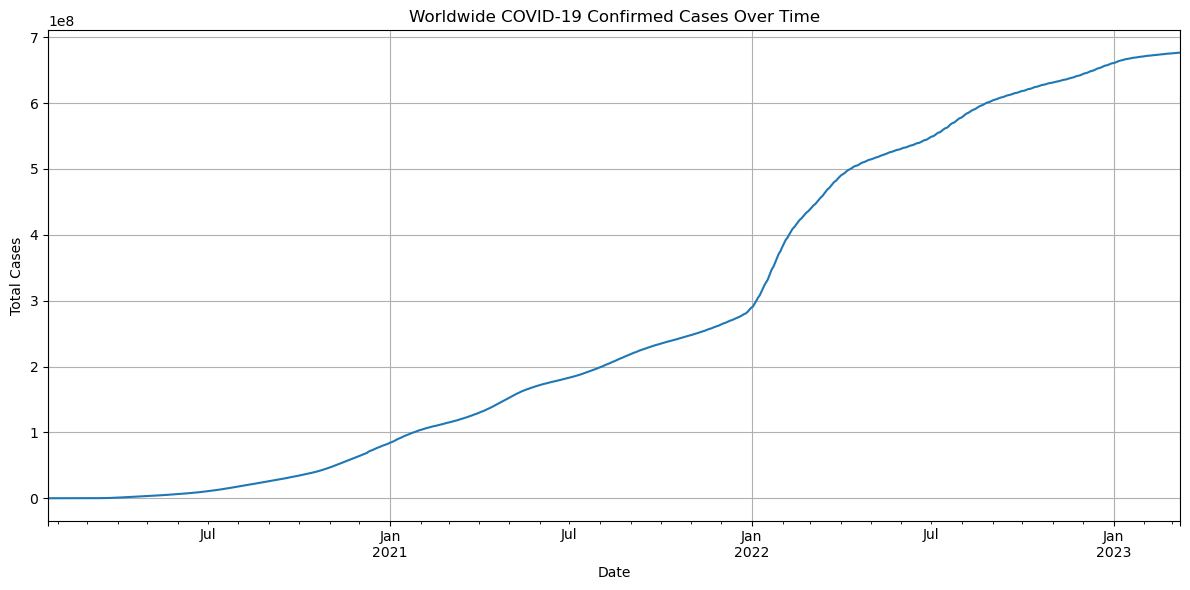

In [14]:
import matplotlib.pyplot as plt

# Aggregate by date
worldwide = cases_grouped.groupby("Date")["Confirmed"].sum()

# Plot
plt.figure(figsize=(12,6))
worldwide.plot()
plt.title("Worldwide COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


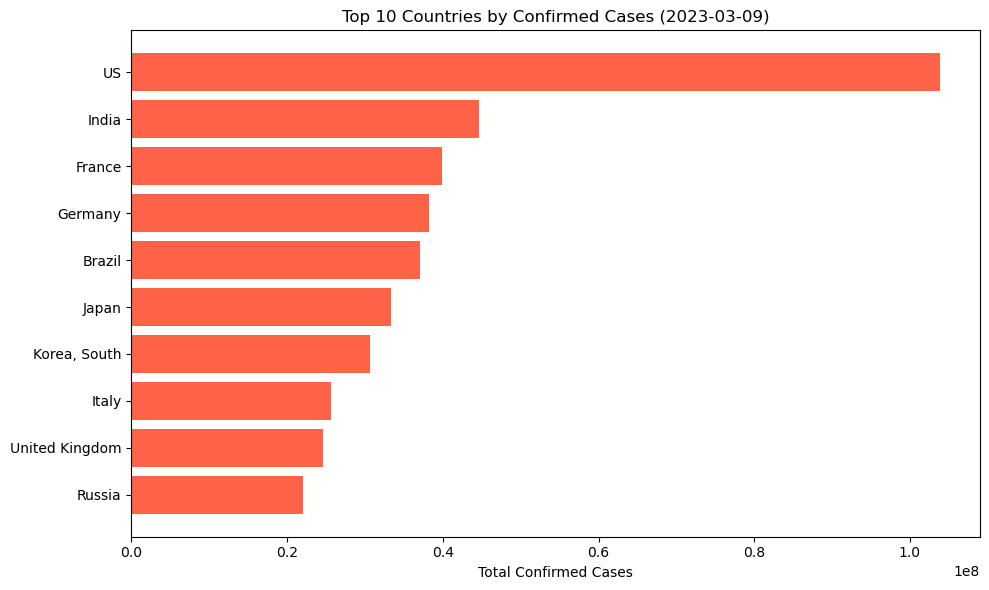

In [15]:
# Latest date
latest_date = cases_grouped["Date"].max()

# Filter latest data
latest_data = cases_grouped[cases_grouped["Date"] == latest_date]

# Top 10 countries
top10 = latest_data.sort_values(by="Confirmed", ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top10["Country/Region"], top10["Confirmed"], color="tomato")
plt.title(f"Top 10 Countries by Confirmed Cases ({latest_date.date()})")
plt.xlabel("Total Confirmed Cases")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [16]:
vacc_df = pd.read_csv('data/vaccinations.csv')

# Keep useful columns
vacc_df = vacc_df[["location", "date", "total_vaccinations"]]
vacc_df = vacc_df.rename(columns={"location": "Country/Region", "date": "Date"})

# Convert date to datetime
vacc_df["Date"] = pd.to_datetime(vacc_df["Date"])


In [17]:
merged_df = pd.merge(cases_grouped, vacc_df, on=["Country/Region", "Date"], how="inner")


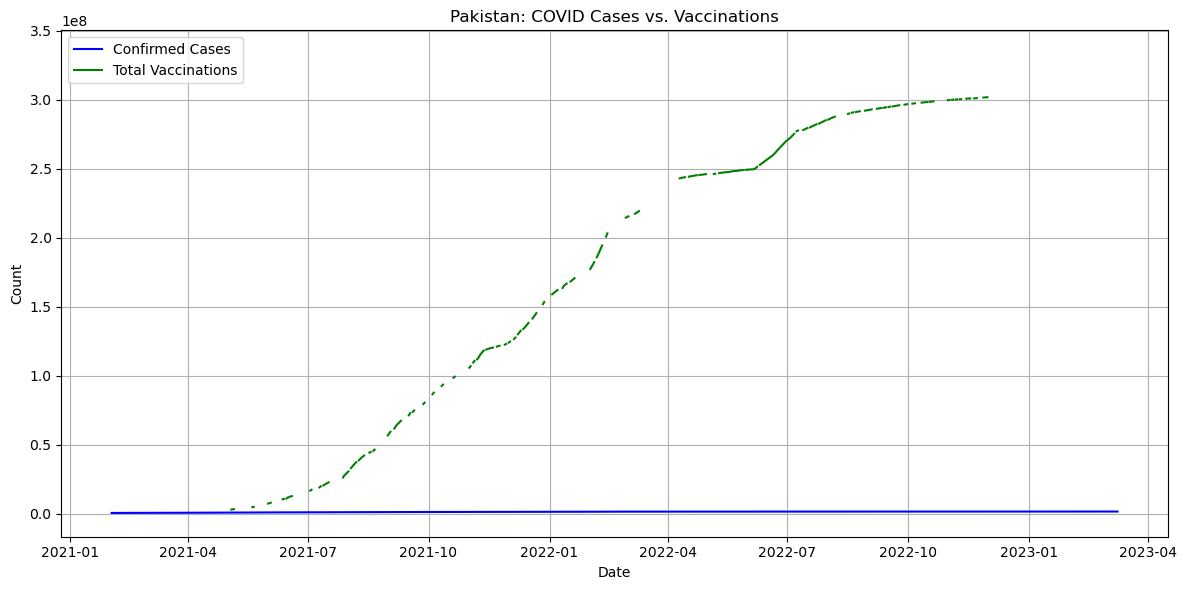

In [18]:
country = "Pakistan"
country_df = merged_df[merged_df["Country/Region"] == country]

plt.figure(figsize=(12,6))
plt.plot(country_df["Date"], country_df["Confirmed"], label="Confirmed Cases", color='blue')
plt.plot(country_df["Date"], country_df["total_vaccinations"], label="Total Vaccinations", color='green')
plt.title(f"{country}: COVID Cases vs. Vaccinations")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [19]:
pip install streamlit


  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/62/b1/44bd5f0eb1a6d9fa045db1e8bca77dc6751c12f7dacebf820ee708ea5acc/streamlit-1.47.0-py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/aa/f3/0b6ced594e51cc95d8c1fc1640d3623770d01e4969d29c0bd09945fafefa/altair-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.5.0 from https://files.pythonhosted.org/packages/10/cb/f2ad4230dc2eb1a74edf38f1a38b9b52277f75bef262d8908e60d957e13c/blinker-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/1d/9a/4114a9057db2f1462d5c8f8390ab7383925fe1ac012eaa42402ad65c2963/GitPython-3.1.44-py3-none-any.whl.metadata
  Obtaining dependency information for pydeck<1,>=0.8.0b4 from https://files.pythonhosted.org/packages/ab/4c/b888e6cf58bd9db9c93f40d1c6be8283ff49d88919231afe93

2025-07-17 13:55:59.673 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-17 13:56:00.381 
  command:

    streamlit run C:\Users\ahmad talha\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-17 13:56:00.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-17 13:56:00.392 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-17 13:56:00.395 No runtime found, using MemoryCacheStorageManager
2025-07-17 13:56:00.400 No runtime found, using MemoryCacheStorageManager
2025-07-17 13:56:00.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-17 13:56:00.413 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-17 13:56:00

DeltaGenerator()

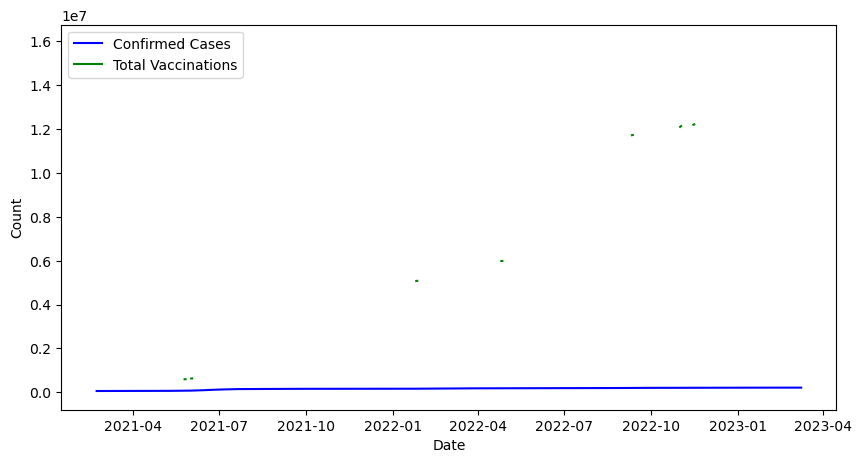

In [20]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Title
st.title("🌍 COVID-19 Data Dashboard")

# Load Data
@st.cache_data
def load_data():
    cases = pd.read_csv("data/time_series_covid19_confirmed_global.csv")
    vacc = pd.read_csv("data/vaccinations.csv")
    return cases, vacc

cases_df, vacc_df = load_data()

# Preprocess cases
cases_long = cases_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"],
                           var_name="Date", value_name="Confirmed")
cases_long["Date"] = pd.to_datetime(cases_long["Date"])
cases_grouped = cases_long.groupby(['Country/Region', 'Date'])['Confirmed'].sum().reset_index()

# Preprocess vaccinations
vacc_df = vacc_df[["location", "date", "total_vaccinations"]]
vacc_df = vacc_df.rename(columns={"location": "Country/Region", "date": "Date"})
vacc_df["Date"] = pd.to_datetime(vacc_df["Date"])

# Merge datasets
merged = pd.merge(cases_grouped, vacc_df, on=["Country/Region", "Date"], how="inner")

# Sidebar
country = st.sidebar.selectbox("Select a Country", merged["Country/Region"].unique())

# Filter for selected country
data = merged[merged["Country/Region"] == country]

# Plot
st.subheader(f"📈 {country} - Confirmed Cases vs. Total Vaccinations")

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data["Date"], data["Confirmed"], label="Confirmed Cases", color='blue')
ax.plot(data["Date"], data["total_vaccinations"], label="Total Vaccinations", color='green')
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.legend()
st.pyplot(fig)
